In [1]:
%pip install opendatasets
# %pip install panda
# %pip install tensorflow
# %pip install keras

import opendatasets as od
import pandas

In [2]:
import tensorflow as tf
from keras import *
import numpy as np
import seaborn as sns
import cv2
from sklearn.metrics import *
import os
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import matplotlib.pyplot as plt

In [3]:
od.download("https://www.kaggle.com/datasets/iarunava/cell-images-for-detecting-malaria/download?datasetVersionNumber=1")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: c0drix
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/iarunava/cell-images-for-detecting-malaria


100%|██████████| 675M/675M [00:06<00:00, 106MB/s]


In [4]:
import tensorflow as tf
from keras import *
import numpy as np
import seaborn as sns
import cv2
from sklearn.metrics import *
import os

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tqdm import tqdm
import matplotlib.pyplot as plt

In [5]:
def get_image(path, img_size ):
    img = np.array(tf.keras.utils.load_img(
        path,
        color_mode='rgb',
        target_size = img_size,
        interpolation ='nearest',
        keep_aspect_ratio = False
    ))
    return img

In [6]:
folder_path1 = r"/content/cell-images-for-detecting-malaria/cell_images/Parasitized"
folder_path2 = r"/content/cell-images-for-detecting-malaria/cell_images/Uninfected"
def load_images(folder_path, img_size):
    images_names = os.listdir(folder_path)
    X = np.zeros((7000, *img_size))
    for i, img_name in enumerate(images_names ):
        if i > 6999:
          break
        try:

            img_path = os.path.join(folder_path, img_name)
            img_array = get_image(img_path, img_size)
            X[i] = img_array
        except:
            X[i] = X[i - 1]
    return X / 255.0

cls1 = load_images(folder_path1, (64, 64, 3))
cls2 = load_images(folder_path2, (64, 64, 3))
cls1.shape, cls2.shape



((7000, 64, 64, 3), (7000, 64, 64, 3))

In [7]:
def show_images(images, labels):
    for i in range(15):
        plt.subplot(3, 5, i + 1)
        plt.imshow(images[i])
        plt.title(int(labels[i]))
        plt.xticks([])
        plt.yticks([])
    plt.tight_layout()
    plt.show()

In [8]:
label1 = np.ones(len(cls1),)
label2 = np.zeros(len(cls2),)
label1.shape, label2.shape

((7000,), (7000,))

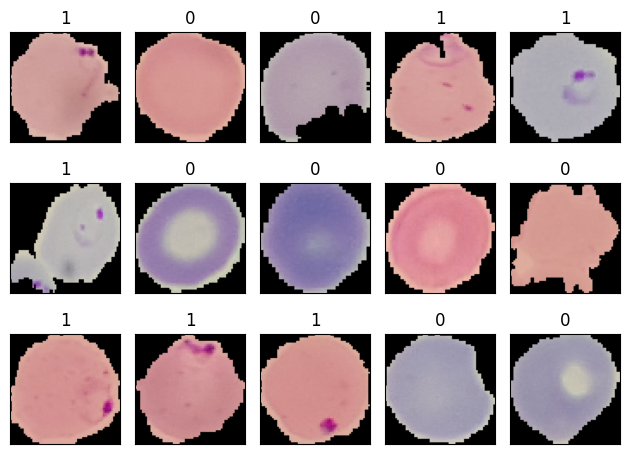

((9520, 64, 64, 3),
 (2800, 64, 64, 3),
 (1680, 64, 64, 3),
 (9520,),
 (2800,),
 (1680,))

In [9]:
X = np.concatenate([cls1, cls2], axis = 0)
y = np.concatenate([label1, label2], axis = 0)

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=1)

show_images(X_val, y_val)
X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape , y_val.shape

In [66]:
model = Sequential()

model.add(Conv2D(64, kernel_size=(2, 2), activation="relu", padding="same", input_shape=(64, 64, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, kernel_size=(2, 2), activation="relu", padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(2, 2), activation="relu", padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dense(64, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(28, activation="relu"))

model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(1, activation="sigmoid"))

In [67]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0005), loss="binary_crossentropy", metrics=["accuracy"])

In [68]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
298/298 [==============================] - 7s 15ms/step - loss: 0.6609 - accuracy: 0.5888 - val_loss: 0.6059 - val_accuracy: 0.6667
Epoch 2/20
298/298 [==============================] - 3s 11ms/step - loss: 0.4579 - accuracy: 0.8145 - val_loss: 0.2652 - val_accuracy: 0.8976
Epoch 3/20
298/298 [==============================] - 3s 11ms/step - loss: 0.2351 - accuracy: 0.9255 - val_loss: 0.1405 - val_accuracy: 0.9583
Epoch 4/20
298/298 [==============================] - 3s 11ms/step - loss: 0.1628 - accuracy: 0.9488 - val_loss: 0.1369 - val_accuracy: 0.9577
Epoch 5/20
298/298 [==============================] - 4s 13ms/step - loss: 0.1565 - accuracy: 0.9496 - val_loss: 0.1253 - val_accuracy: 0.9577
Epoch 6/20
298/298 [==============================] - 3s 11ms/step - loss: 0.1510 - accuracy: 0.9521 - val_loss: 0.1303 - val_accuracy: 0.9554
Epoch 7/20
298/298 [==============================] - 3s 11ms/step - loss: 0.1427 - accuracy: 0.9530 - val_loss: 0.1348 - val_accuracy: 0.9536

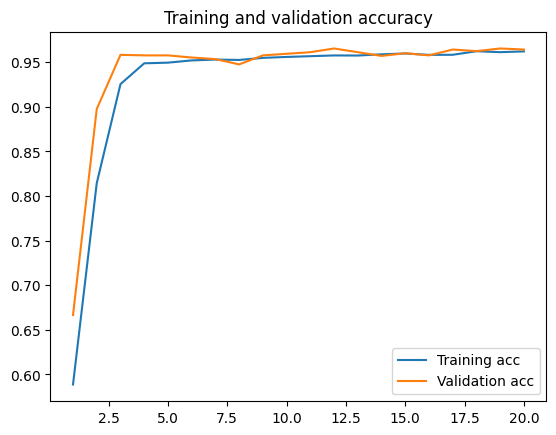

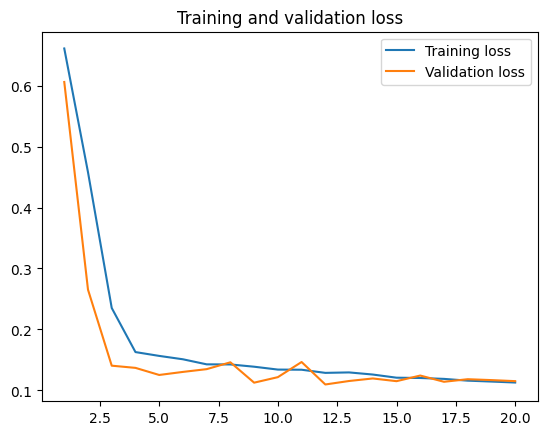

In [70]:

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

88/88 [==============================] - 1s 7ms/step
Confusion matrix:
F1 score: 0.948616600790514
Precision score: 0.9620991253644315
Accuracy score: 0.9489285714285715


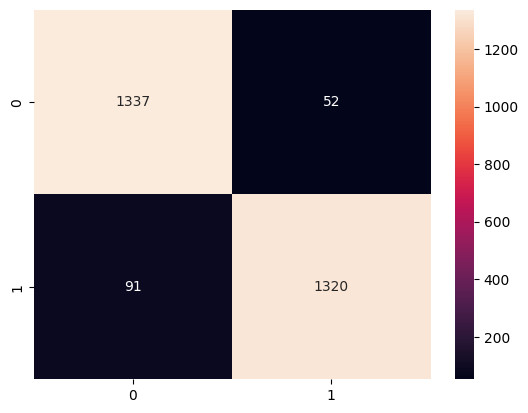

In [71]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, accuracy_score

y_pred = model.predict(X_test)

y_pred_binary = [1 if pred > 0.5 else 0 for pred in y_pred]

cm = confusion_matrix(y_test, y_pred_binary)

f1 = f1_score(y_test, y_pred_binary)

precision = precision_score(y_test, y_pred_binary)

accuracy = accuracy_score(y_test, y_pred_binary)

print("Confusion matrix:")
print("F1 score:", f1)
print("Precision score:", precision)
print("Accuracy score:", accuracy)
sns.heatmap(cm, annot = True, fmt = '.0f')
plt.show()

In [72]:
model.save("/content/cell-images-for-detecting-malaria/CNN_Dense_NN.h5",save_format='h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
